## Dataset loading

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/elce457_data/small/bengio.npz bengio.npz

import tensorflow as tf
import os
import numpy as np
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

with np.load('bengio.npz') as d:
    data_x, data_y = d['x'].astype(np.uint8), d['y'].astype(np.bool)

### Installing required packages and modules

In [ ]:
!pip install segmentation_models==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# you need a few more libraries to work with ONNX
!pip install tf2onnx onnxruntime onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 442 kB 32.5 MB/s 
     |████████████████████████████████| 4.5 MB 57.6 MB/s 
     |████████████████████████████████| 13.1 MB 61.2 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 


### Dataset split into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.20, random_state = 42, shuffle = True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3200, 128, 128, 3)
(3200, 128, 128, 18)
(800, 128, 128, 3)
(800, 128, 128, 18)


Mask extraction

In [ ]:
mask1 = y_train[2,:,:,0]
mask2 = y_train[2,:,:,1]
mask3 = y_train[2,:,:,2]
mask4 = y_train[2,:,:,3]
mask5 = y_train[2,:,:,4]
mask6 = y_train[2,:,:,5]
mask7 = y_train[2,:,:,6]
mask8 = y_train[2,:,:,7]
mask9 = y_train[2,:,:,8]
mask10 = y_train[2,:,:,9]
mask11 = y_train[2,:,:,10]
mask12 = y_train[2,:,:,11]
mask13 = y_train[2,:,:,12]
mask14 = y_train[2,:,:,13]
mask15 = y_train[2,:,:,14]
mask16 = y_train[2,:,:,15]
mask17 = y_train[2,:,:,16]
mask18 = y_train[2,:,:,17]
mask1_ch = mask1/4
mask2_ch = mask2/3
mask4_ch = mask4/5
mask5_ch = mask5/5
mask6_ch = mask6/2
mask7_ch = mask7/2
mask8_ch = mask8/2
mask9_ch = mask9/2
mask10_ch = mask10/3
mask11_ch = mask11/2
mask12_ch = mask12/2
mask13_ch = mask13
mask14_ch = mask14/3
mask15_ch = mask15/2
mask16_ch = mask16/3
mask17_ch = mask17
mask18_ch = mask18
mask_uni_3 = mask1_ch+mask3+mask13_ch+mask11_ch+mask12_ch+mask10_ch+mask2_ch+mask4_ch+mask5_ch+mask6_ch+mask7_ch+mask15_ch+mask17_ch+mask18_ch+mask8_ch+mask9_ch+mask14_ch+mask16_ch

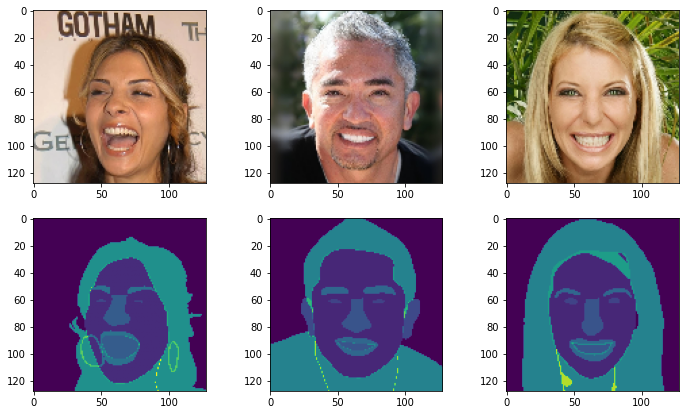

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7),)
axes[0,0].imshow(X_train[0])
axes[1,0].imshow(mask_uni_1)
axes[0,1].imshow(X_train[1])
axes[1,1].imshow(mask_uni_2)
axes[0,2].imshow(X_train[2])
axes[1,2].imshow(mask_uni_3)

### Data visualization

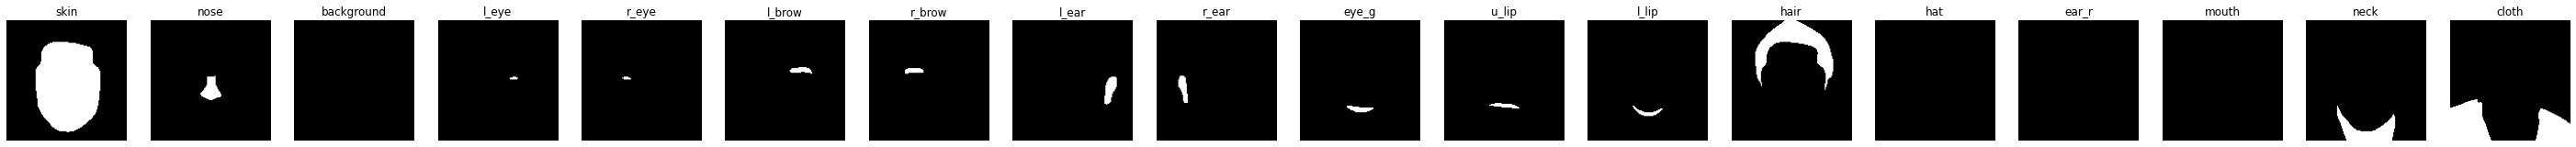

In [ ]:
import matplotlib.pyplot as plt
def visualize(mask, mask_names):
      fig, axes = plt.subplots(1, 18, figsize=(50,30))
      for i, ax in enumerate(axes):
         ax.imshow(mask[:, :, i], cmap='gray')
         ax.axis('off')
         ax.set_title(mask_names[i])

mask_names = [
   'skin', 
   'nose',
   'background',
   'l_eye',
   'r_eye',
   'l_brow',
   'r_brow',
   'l_ear',
   'r_ear',
   'eye_g',
   'u_lip',
   'l_lip',
   'hair',
   'hat',
   'ear_r',
   'mouth',
   'neck', 
   'cloth',
]

visualize(y_train[1], mask_names=mask_names)

### Data augmentation

In [ ]:
from albumentations import HorizontalFlip, RandomRotate90
import albumentations as A 
transform = A.Compose([HorizontalFlip(p=1.0)])

for i in range(800):
  transformed = transform(image=X_train[i], mask=y_train[i])
  aug_img = np.expand_dims(transformed['image'], axis=0)
  aug_mask = np.expand_dims(transformed['mask'], axis=0)
  X_train = np.append(X_train, aug_img).reshape(-1,128,128,3)
  y_train = np.append(y_train, aug_mask).reshape(-1,128,128,18)

In [ ]:
for i in range(800, 1600, 1):
  transformed = transform(image=X_train[i], mask=y_train[i])
  aug_img = np.expand_dims(transformed['image'], axis=0)
  aug_mask = np.expand_dims(transformed['mask'], axis=0)
  X_train = np.append(X_train, aug_img).reshape(-1,128,128,3)
  y_train = np.append(y_train, aug_mask).reshape(-1,128,128,18)

In [ ]:
for i in range(1600, 2400, 1):
  transformed = transform(image=X_train[i], mask=y_train[i])
  aug_img = np.expand_dims(transformed['image'], axis=0)
  aug_mask = np.expand_dims(transformed['mask'], axis=0)
  X_train = np.append(X_train, aug_img).reshape(-1,128,128,3)
  y_train = np.append(y_train, aug_mask).reshape(-1,128,128,18)

In [ ]:
for i in range(2400, 3200, 1):
  transformed = transform(image=X_train[i], mask=y_train[i])
  aug_img = np.expand_dims(transformed['image'], axis=0)
  aug_mask = np.expand_dims(transformed['mask'], axis=0)
  X_train = np.append(X_train, aug_img).reshape(-1,128,128,3)
  y_train = np.append(y_train, aug_mask).reshape(-1,128,128,18)

In [ ]:
y_train.shape

(6400, 128, 128, 18)

In [ ]:
X_train.shape

(6400, 128, 128, 3)

### Results of data augmentation

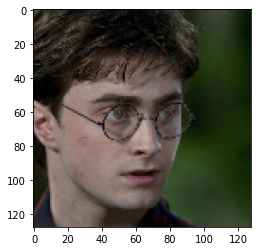

In [ ]:
plt.imshow(X_train[800])

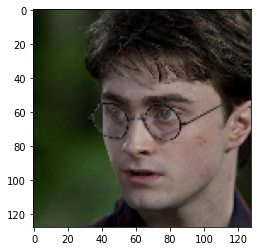

In [ ]:
plt.imshow(X_train[4000])

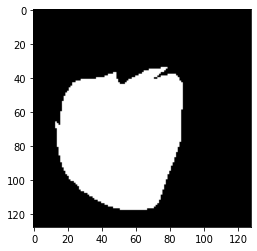

In [ ]:
plt.imshow(y_train[800,:,:,0], cmap = 'gray')

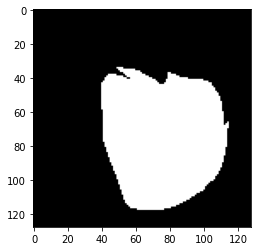

In [ ]:
plt.imshow(y_train[4000,:,:,0], cmap = 'gray')

## Normalization, batching and prefetching

In [ ]:
def normalize_img(x, y):
  return tf.cast(x, tf.float32) / 255., tf.cast(y, tf.float32)

batch_size = 8
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(batch_size*4).batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size=4)

valid_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_dataset = valid_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
valid_dataset = valid_dataset.shuffle(batch_size*4).batch(batch_size)
valid_dataset = valid_dataset.prefetch(buffer_size=4)

### Checking the shape and the content of images and masks

In [ ]:
# iterate over dataset
for x, y in train_dataset:
  break

print(x.shape, y.shape)
print(x[1])

(4, 128, 128, 3) (4, 128, 128, 18)
tf.Tensor(
[[[0.68235296 0.75686276 0.78431374]
  [0.68235296 0.75686276 0.78431374]
  [0.68235296 0.7529412  0.7921569 ]
  ...
  [0.60784316 0.6745098  0.7058824 ]
  [0.6117647  0.6666667  0.7019608 ]
  [0.6117647  0.6666667  0.7019608 ]]

 [[0.6862745  0.7607843  0.7882353 ]
  [0.68235296 0.75686276 0.78431374]
  [0.68235296 0.7529412  0.7921569 ]
  ...
  [0.60784316 0.6745098  0.7058824 ]
  [0.6117647  0.6666667  0.7019608 ]
  [0.6117647  0.6666667  0.7019608 ]]

 [[0.68235296 0.75686276 0.78431374]
  [0.68235296 0.75686276 0.78431374]
  [0.68235296 0.7529412  0.7921569 ]
  ...
  [0.60784316 0.6745098  0.7058824 ]
  [0.60784316 0.6745098  0.7019608 ]
  [0.6039216  0.67058825 0.69803923]]

 ...

 [[0.25490198 0.24313726 0.24313726]
  [0.22352941 0.23137255 0.23137255]
  [0.47843137 0.18431373 0.2       ]
  ...
  [0.06666667 0.0627451  0.05490196]
  [0.08627451 0.07058824 0.05882353]
  [0.22745098 0.21176471 0.2       ]]

 [[0.23529412 0.23529412 0.2

## Building model architecture

### DeepLabV3+ model

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

def Squeeze_And_Excitation(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = init * se
    return x

def ASPP(inputs):
    """ Image Pooling """
    shape = inputs.shape
    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = Conv2D(256, 1, padding="same", use_bias=False)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    """ 1x1 conv """
    y2 = Conv2D(256, 1, padding="same", use_bias=False)(inputs)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    """ 3x3 conv rate=6 """
    y3 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=6)(inputs)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    """ 3x3 conv rate=12 """
    y4 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=12)(inputs)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    """ 3x3 conv rate=18 """
    y5 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=18)(inputs)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])
    y = Conv2D(256, 1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def DeepLabv3_Plus(shape):
    """ Input """
    inputs = Input(shape)

    """ Encoder """
    encoder = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs)

    image_features = encoder.get_layer("conv4_block6_out").output
    x_a = ASPP(image_features)
    x_a = UpSampling2D((4, 4), interpolation="bilinear")(x_a)

    x_b = encoder.get_layer("conv2_block2_out").output
    x_b = Conv2D(filters=48, kernel_size=1, padding='same', use_bias=False)(x_b)
    x_b = BatchNormalization()(x_b)
    x_b = Activation('relu')(x_b)

    x = Concatenate()([x_a, x_b])
    x = Squeeze_And_Excitation(x) 

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Squeeze_And_Excitation(x)

    x = UpSampling2D((4, 4), interpolation="bilinear")(x)
    x = Conv2D(18, 1, padding="same", activation="sigmoid")(x)

    model = Model(inputs, x)
    return model

### Introducing metrics and loss function

In [ ]:
import segmentation_models as sm
dice_loss = sm.losses.DiceLoss(class_weights=1, smooth=0.01) 
metrics = sm.metrics.IOUScore(threshold=0.5)
metrics_2 = sm.metrics.Precision(threshold=0.5)
metrics_3 = sm.metrics.Recall(threshold=0.5)

Segmentation Models: using `keras` framework.


### Model compile

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
H = 128
W = 128
lr = 1e-4
loss = tf.keras.losses.BinaryFocalCrossentropy(label_smoothing=0.1)
model = DeepLabv3_Plus((H, W, 3))
model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[metrics])

NameError: ignored

In [ ]:
from tensorflow.keras.optimizers import Adam
lr = 1e-4
model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[metrics_2])

### Model summary

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

## Model training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
model_filepath = '/content/drive/MyDrive/DeepLabV3+ Model/model2.hdf5'

callbacks = [
  ModelCheckpoint(model_filepath, verbose=1, save_best_only=True),
  ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
  TensorBoard(),
  EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False),
]

history = model.fit(train_dataset,
  validation_data=valid_dataset,
  epochs=80,
  callbacks=callbacks
    )

Epoch 1/80
400/400 [==============================] - ETA: 0s - loss: 0.7450 - iou_score: 0.2729
Epoch 1: val_loss improved from inf to 0.99207, saving model to /content/drive/MyDrive/DeepLabV3+ Model/model2.hdf5
400/400 [==============================] - 63s 143ms/step - loss: 0.7450 - iou_score: 0.2729 - val_loss: 0.9921 - val_iou_score: 0.0909 - lr: 1.0000e-04
Epoch 2/80
400/400 [==============================] - ETA: 0s - loss: 0.3838 - iou_score: 0.5812
Epoch 2: val_loss improved from 0.99207 to 0.47297, saving model to /content/drive/MyDrive/DeepLabV3+ Model/model2.hdf5
400/400 [==============================] - 56s 140ms/step - loss: 0.3838 - iou_score: 0.5812 - val_loss: 0.4730 - val_iou_score: 0.4704 - lr: 1.0000e-04
Epoch 3/80
400/400 [==============================] - ETA: 0s - loss: 0.3234 - iou_score: 0.6414
Epoch 3: val_loss improved from 0.47297 to 0.32916, saving model to /content/drive/MyDrive/DeepLabV3+ Model/model2.hdf5
400/400 [==============================] - 56s 

In [ ]:
import pickle
with open('/content/drive/MyDrive/DeepLabV3+ Model/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

### Loss and IOU graphs

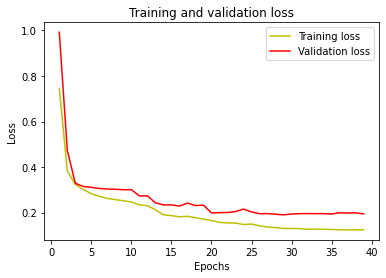

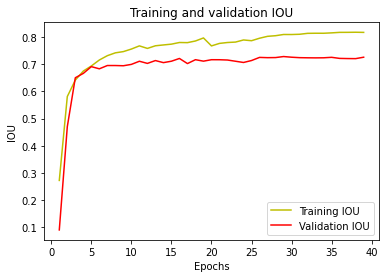

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

## Loading the model

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/DeepLabV3+ Model/Group1_Bengio.hdf5', compile=False)

### Model's predictions

In [ ]:
mIOU = model.evaluate(valid_dataset)

100/100 [==============================] - 10s 39ms/step - loss: 0.1936 - iou_score: 0.7255


In [ ]:
precision = model.evaluate(valid_dataset)

100/100 [==============================] - 6s 40ms/step - loss: 0.1957 - precision: 0.8654


In [ ]:
recall = model.evaluate(valid_dataset)

100/100 [==============================] - 6s 40ms/step - loss: 0.1941 - recall: 0.8134


In [ ]:
X_test, y_test = normalize_img(X_test,y_test)

In [ ]:
y_pred = model.predict(X_test)

25/25 [==============================] - 7s 99ms/step


In [ ]:
y_pred_labels = np.where(y_pred>=0.5, 1,0)

### Visualization of predicted masks

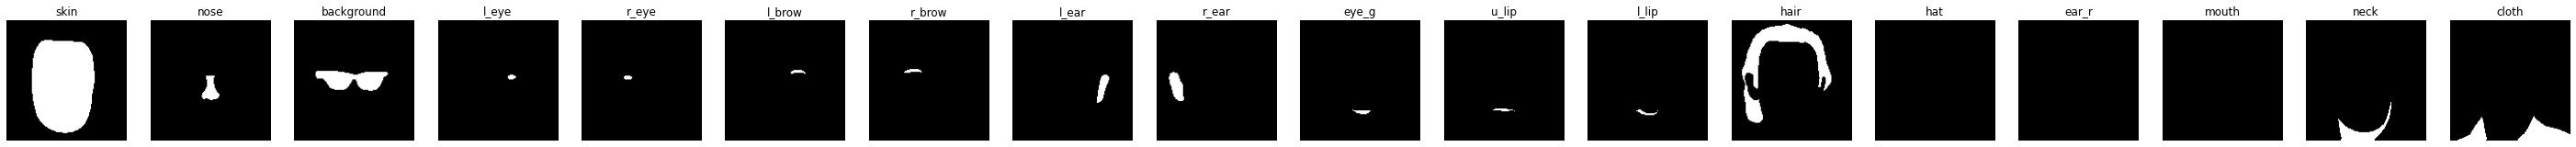

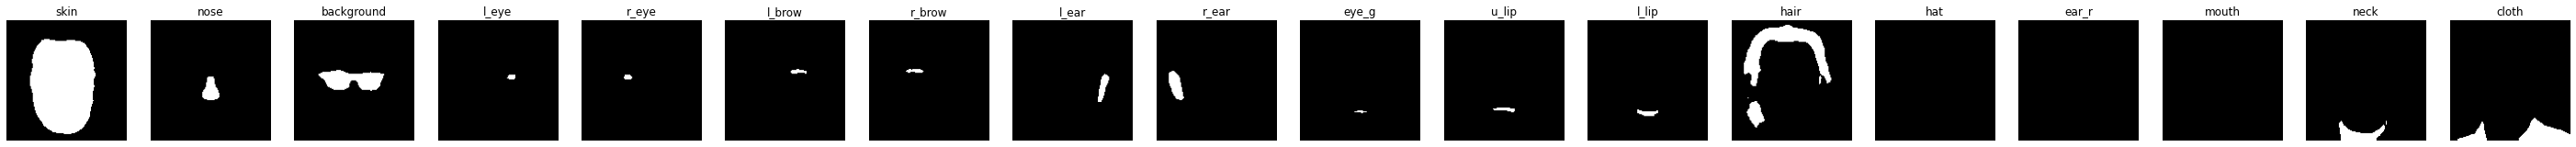

In [ ]:
visualize(y_test[90], mask_names=mask_names)
visualize(y_pred_labels[90], mask_names=mask_names)

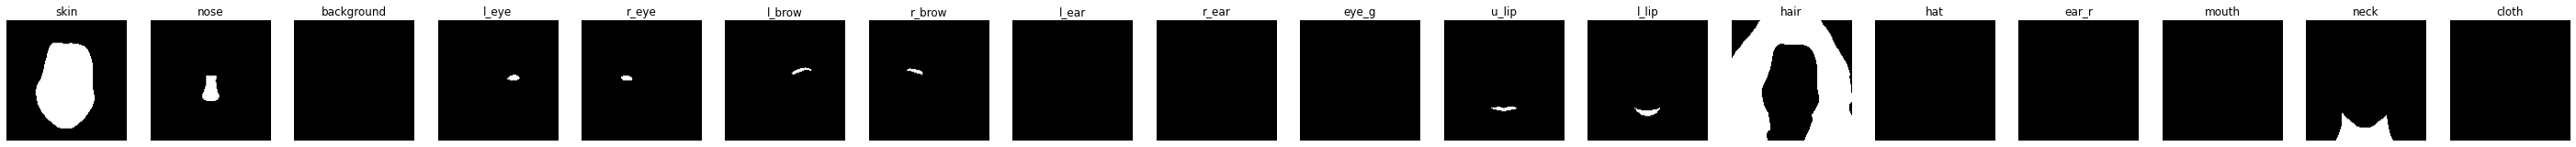

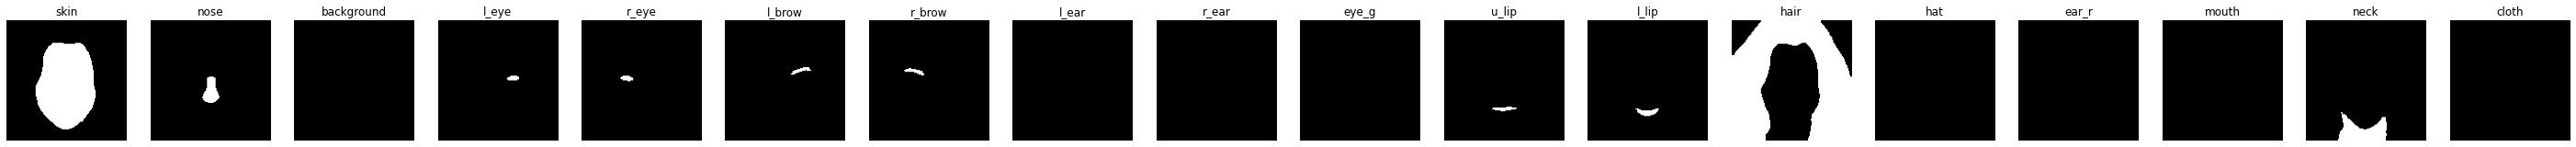

In [ ]:
visualize(y_test[100], mask_names=mask_names)
visualize(y_pred_labels[100], mask_names=mask_names)

### mIoU per class

In [ ]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

for i in range(18):
  iou_class = iou(y_test[:,:,:,i],y_pred_labels[:,:,:,i])
  print("For class {}:".format(i), iou_class)

For class 0: tf.Tensor(0.9304085, shape=(), dtype=float32)
For class 1: tf.Tensor(0.8578261, shape=(), dtype=float32)
For class 2: tf.Tensor(0.7454774, shape=(), dtype=float32)
For class 3: tf.Tensor(0.7530504, shape=(), dtype=float32)
For class 4: tf.Tensor(0.74823624, shape=(), dtype=float32)
For class 5: tf.Tensor(0.68144286, shape=(), dtype=float32)
For class 6: tf.Tensor(0.67389745, shape=(), dtype=float32)
For class 7: tf.Tensor(0.6802627, shape=(), dtype=float32)
For class 8: tf.Tensor(0.6646278, shape=(), dtype=float32)
For class 9: tf.Tensor(0.7455799, shape=(), dtype=float32)
For class 10: tf.Tensor(0.6936779, shape=(), dtype=float32)
For class 11: tf.Tensor(0.75852036, shape=(), dtype=float32)
For class 12: tf.Tensor(0.86653996, shape=(), dtype=float32)
For class 13: tf.Tensor(8.05328e-21, shape=(), dtype=float32)
For class 14: tf.Tensor(0.35220456, shape=(), dtype=float32)
For class 15: tf.Tensor(0.032724813, shape=(), dtype=float32)
For class 16: tf.Tensor(0.7784523, shape

In [ ]:
np.array(y_test[:,:,:,0]).reshape(-1).shape

(13107200,)

In [ ]:
from sklearn.metrics import precision_score
for i in range(18):
  precision = precision_score(np.array(y_test[:,:,:,i]).reshape(-1), np.array(y_pred_labels[:,:,:,i]).reshape(-1))
  print("For class {}:".format(i), precision)

For class 0: 0.9667021126361058
For class 1: 0.9127737430950845
For class 2: 0.9080504414925296
For class 3: 0.8635735984534659
For class 4: 0.8639782764755455
For class 5: 0.795519019003752
For class 6: 0.7841313565879476
For class 7: 0.8314980020444197
For class 8: 0.8109109231795836
For class 9: 0.8673062412417808
For class 10: 0.8129011355220933
For class 11: 0.8597460422163589
For class 12: 0.9274798316044837


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For class 13: 0.0
For class 14: 0.6528749889253123
For class 15: 0.49794238683127573
For class 16: 0.884948345612811
For class 17: 0.8667096831265334


In [ ]:
from sklearn.metrics import recall_score
for i in range(18):
  recall = recall_score(np.array(y_test[:,:,:,i]).reshape(-1), np.array(y_pred_labels[:,:,:,i]).reshape(-1))
  print("For class {}:".format(i), recall)

For class 0: 0.9612132180859363
For class 1: 0.9344260530404424
For class 2: 0.8063462865026443
For class 3: 0.8547348599890664
For class 4: 0.8481478077029139
For class 5: 0.8261503128217312
For class 6: 0.827397573441761
For class 7: 0.7890345124061684
For class 8: 0.786521899931315
For class 9: 0.8415789803987197
For class 10: 0.82547118081123
For class 11: 0.8656344693038894
For class 12: 0.9295197947648987
For class 13: 0.0
For class 14: 0.43335587638566264
For class 15: 0.033841420780310445
For class 16: 0.8661076766724441
For class 17: 0.7569217695189924


In [ ]:
from sklearn.metrics import f1_score
for i in range(18):
  f1score = f1_score(np.array(y_test[:,:,:,i]).reshape(-1), np.array(y_pred_labels[:,:,:,i]).reshape(-1))
  print("For class {}:".format(i), f1score)

For class 0: 0.9639498517493694
For class 1: 0.9234729971967935
For class 2: 0.8541816366050007
For class 3: 0.8591314966038311
For class 4: 0.8559898571340219
For class 5: 0.8105453726078274
For class 6: 0.8051836608214084
For class 7: 0.8097099129569195
For class 8: 0.7985302301879456
For class 9: 0.8542489489106893
For class 10: 0.819137937735629
For class 11: 0.8626802076654189
For class 12: 0.9284986927079726
For class 13: 0.0
For class 14: 0.5209338493893926
For class 15: 0.06337567107502946
For class 16: 0.8754266520765546
For class 17: 0.8081038661113038


In [ ]:
mask1 = y_test[3,:,:,0]
mask2 = y_test[3,:,:,1]
mask3 = y_test[3,:,:,2]
mask4 = y_test[3,:,:,3]
mask5 = y_test[3,:,:,4]
mask6 = y_test[3,:,:,5]
mask7 = y_test[3,:,:,6]
mask8 = y_test[3,:,:,7]
mask9 = y_test[3,:,:,8]
mask10 = y_test[3,:,:,9]
mask11 = y_test[3,:,:,10]
mask12 = y_test[3,:,:,11]
mask13 = y_test[3,:,:,12]
mask14 = y_test[3,:,:,13]
mask15 = y_test[3,:,:,14]
mask16 = y_test[3,:,:,15]
mask17 = y_test[3,:,:,16]
mask18 = y_test[3,:,:,17]
mask2_ch = mask2/3
mask4_ch = mask4/5
mask5_ch = mask5/5
mask6_ch = mask6/2
mask7_ch = mask7/2
mask10_ch = mask10/3
mask11_ch = mask11/2
mask12_ch = mask12/2
mask13_ch = mask13
mask15_ch = mask15/2
mask17_ch = mask17
mask18_ch = mask18
mask_uni_3 = mask1/4+mask13_ch+mask11_ch+mask12_ch+mask10_ch+mask2_ch+mask4_ch+mask5_ch+mask6_ch+mask7_ch+mask15_ch+mask17_ch+mask18_ch

In [ ]:
mask1_pred = y_pred_labels[3,:,:,0]
mask2_pred = y_pred_labels[3,:,:,1]
mask3_pred = y_pred_labels[3,:,:,2]
mask4_pred = y_pred_labels[3,:,:,3]
mask5_pred = y_pred_labels[3,:,:,4]
mask6_pred = y_pred_labels[3,:,:,5]
mask7_pred = y_pred_labels[3,:,:,6]
mask8_pred = y_pred_labels[3,:,:,7]
mask9_pred = y_pred_labels[3,:,:,8]
mask10_pred = y_pred_labels[3,:,:,9]
mask11_pred = y_pred_labels[3,:,:,10]
mask12_pred = y_pred_labels[3,:,:,11]
mask13_pred = y_pred_labels[3,:,:,12]
mask14_pred = y_pred_labels[3,:,:,13]
mask15_pred = y_pred_labels[3,:,:,14]
mask16_pred = y_pred_labels[3,:,:,15]
mask17_pred = y_pred_labels[3,:,:,16]
mask18_pred = y_pred_labels[3,:,:,17]
mask2_ch_pred = mask2_pred/3
mask4_ch_pred = mask4_pred/5
mask5_ch_pred = mask5_pred/5
mask6_ch_pred = mask6_pred/2
mask7_ch_pred = mask7_pred/2
mask10_ch_pred = mask10_pred/3
mask11_ch_pred = mask11_pred/2
mask12_ch_pred = mask12_pred/2
mask13_ch_pred = mask13_pred
mask15_ch_pred = mask15_pred/2
mask17_ch_pred = mask17_pred
mask18_ch_pred = mask18_pred
mask_uni_3_pred = mask1_pred/4+mask13_ch_pred+mask11_ch_pred+mask12_ch_pred+mask10_ch_pred+mask2_ch_pred+mask4_ch_pred+mask5_ch_pred+mask6_ch_pred+mask7_ch_pred+mask15_ch_pred+mask17_ch_pred+mask18_ch_pred

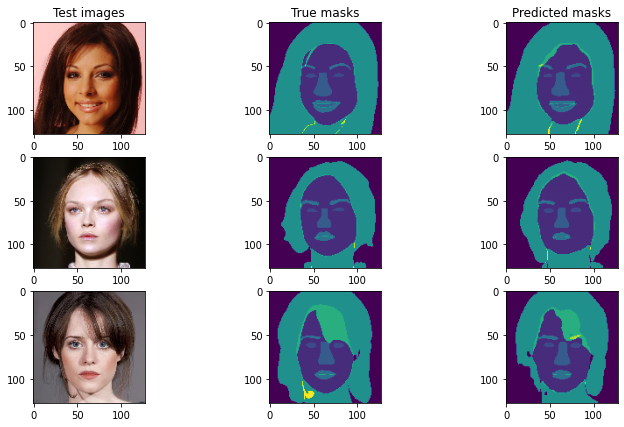

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7),)
axes[0,0].imshow(X_test[0])
axes[0,0].set_title("Test images")
axes[0,1].imshow(mask_uni_0)
axes[0,1].set_title("True masks")
axes[0,2].imshow(mask_uni_0_pred)
axes[0,2].set_title("Predicted masks")
axes[1,0].imshow(X_test[1])
axes[1,1].imshow(mask_uni_1)
axes[1,2].imshow(mask_uni_1_pred)
axes[2,0].imshow(X_test[3])
axes[2,1].imshow(mask_uni_3)
axes[2,2].imshow(mask_uni_3_pred)

### Conversion to the onnx format

In [ ]:
import tf2onnx

model_proto, external_tensor_storage = tf2onnx.convert.from_keras(model)
with open('/content/drive/MyDrive/DeepLabV3+ Model/bengio.onnx', 'wb') as f:
    f.write(model_proto.SerializeToString())